In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("dataset.csv")

# Drop unnecessary columns
df = df.drop(columns=["Unnamed: 0"], errors="ignore")

# Remove duplicates
df = df.drop_duplicates()

# Separate features & target variable
X = df.drop(columns=["label"])  
y = df["label"]  

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Get predictions
log_reg_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, log_reg_pred)
rms = np.sqrt(mean_squared_error(y_test, log_reg_pred))

# Display results
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, log_reg_pred))
print(f"Logistic Regression RMS: {rms:.4f}")


Logistic Regression Accuracy: 0.9654
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     52311
           1       0.84      0.67      0.74       424
           2       1.00      1.00      1.00      9894
           3       0.86      0.76      0.81      6416

    accuracy                           0.97     69045
   macro avg       0.92      0.85      0.88     69045
weighted avg       0.96      0.97      0.96     69045

Logistic Regression RMS: 0.5380


In [7]:
# Train prediction
log_reg_pred = log_reg.predict(X_train)
train_accuracy = accuracy_score(y_train, log_reg_pred)

# Test prediction
log_reg_test_pred = log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, log_reg_test_pred)

print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")



Train Accuracy: 0.9650
Test Accuracy: 0.9654


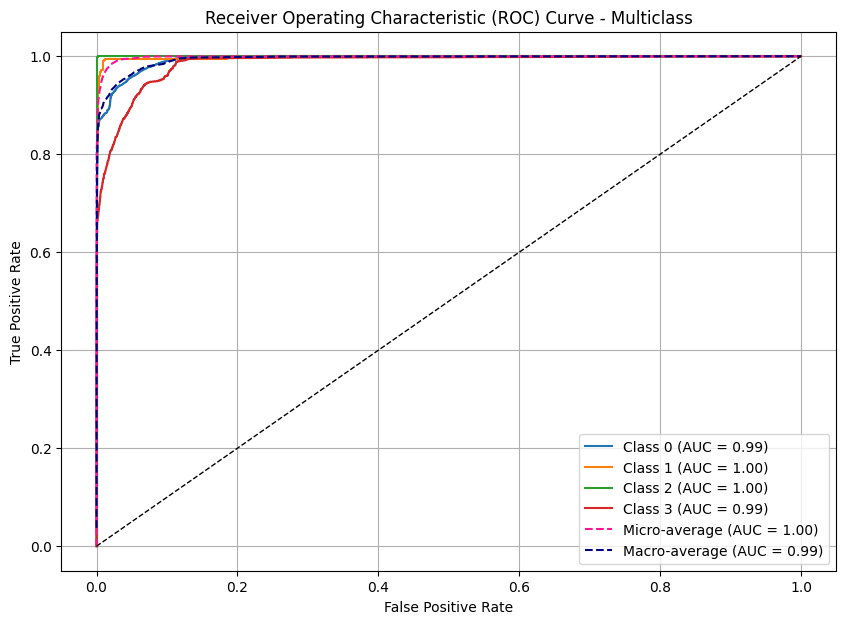

In [3]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output labels for multiclass ROC computation
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get the probability scores for each class
y_score = log_reg.predict_proba(X_test)

# Number of classes
n_classes = y_bin.shape[1]

# Initialize dictionaries to store fpr, tpr, and auc for each class
fpr, tpr, roc_auc = dict(), dict(), dict()

# Compute ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot ROC curves for each class, micro, and macro averages
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', color='deeppink', label=f'Micro-average (AUC = {roc_auc["micro"]:.2f})')
plt.plot(fpr["macro"], tpr["macro"], linestyle='--', color='navy', label=f'Macro-average (AUC = {roc_auc["macro"]:.2f})')

# Plot diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc='lower right')
plt.grid()
plt.show()


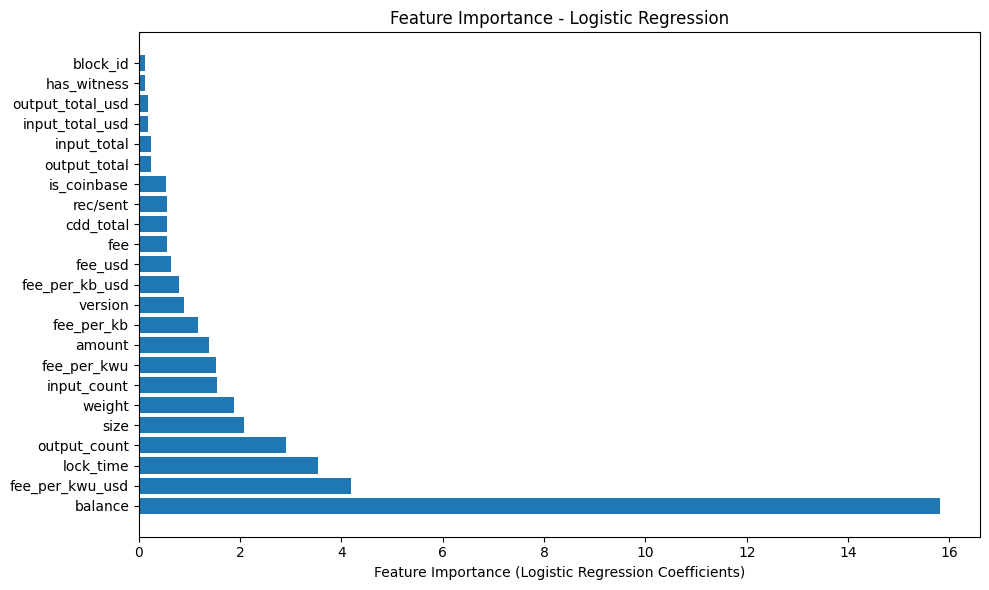

In [4]:
# Get feature coefficients for Logistic Regression
log_reg_coeff = log_reg.coef_[0]

# Sort the coefficients by their absolute value to get the most important features
coef_importance = np.abs(log_reg_coeff)
sorted_indices = np.argsort(coef_importance)[::-1]

# Get feature names
feature_names = df.drop(columns=["label"]).columns

# Plot the importance of each feature
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), coef_importance[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance (Logistic Regression Coefficients)')
plt.title('Feature Importance - Logistic Regression')
plt.tight_layout()
plt.show()
